In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

plt.style.use("seaborn-v0_8")


In [6]:
df = pd.read_csv("sp500_headlines_2008_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()
df = df[df['clean_title'].notna()].reset_index(drop=True)
df.info()
df.to_csv("sp500_headlines_2008_2024.csv",index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        18137 non-null  object        
 1   Date         18137 non-null  datetime64[ns]
 2   CP           18137 non-null  float64       
 3   clean_title  18137 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 566.9+ KB


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['vader_score'] = df['clean_title'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)
df['vader_score'].describe()


count    18137.000000
mean         0.033994
std          0.327582
min         -0.934900
25%          0.000000
50%          0.000000
75%          0.202300
max          0.923100
Name: vader_score, dtype: float64

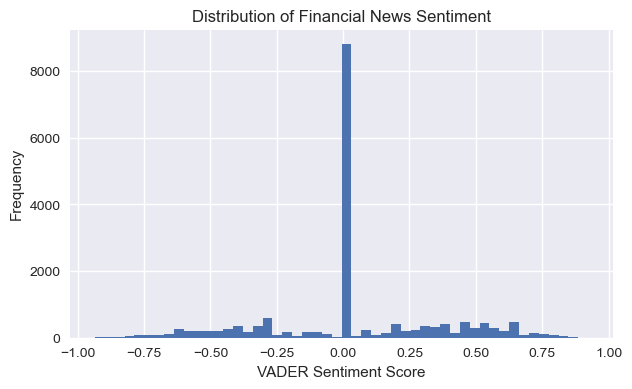

In [28]:
plt.figure(figsize=(7,4))
plt.hist(df['vader_score'], bins=50)
plt.title("Distribution of Financial News Sentiment")
plt.xlabel("VADER Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [9]:
df.sort_values('vader_score').head(5)[['Date', 'Title', 'vader_score']]


,Date,Title,vader_score
7184,2019-10-03,"Dow, S&P 500 mark worst start to a quarter sin...",-0.9349
1402,2012-07-23,‘Pay up or die’: Thousands of Australians rece...,-0.9118
555,2011-04-21,'Fear and greed' index at lowest since financi...,-0.9118
7054,2019-08-14,"Stock Markets, Jolted by Economic Worry, Suffe...",-0.9118
13918,2023-05-04,"Dow, S&P 500 suffer 4-day losing streak on fea...",-0.9062


In [10]:
df.sort_values('vader_score', ascending=False).head(5)[['Date', 'Title', 'vader_score']]


,Date,Title,vader_score
16762,2023-11-22,S&P 500 Set For Best Month Of 2023 As Market G...,0.9231
8577,2020-09-23,Why Stock Market Bulls Had Better Pray the 49e...,0.9169
14049,2023-05-15,Our vision is to help masses optimise their we...,0.8979
16454,2023-11-01,Dow records best three-day gain since April af...,0.8910
15147,2023-08-02,S&P 500 Is Enjoying One of Its Best Years Sinc...,0.8885


In [14]:
daily = df.groupby('Date').agg({
    'vader_score': 'mean',
    'CP': 'mean'
}).reset_index()


In [16]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3507 non-null   datetime64[ns]
 1   vader_score  3507 non-null   float64       
 2   CP           3507 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 82.3 KB


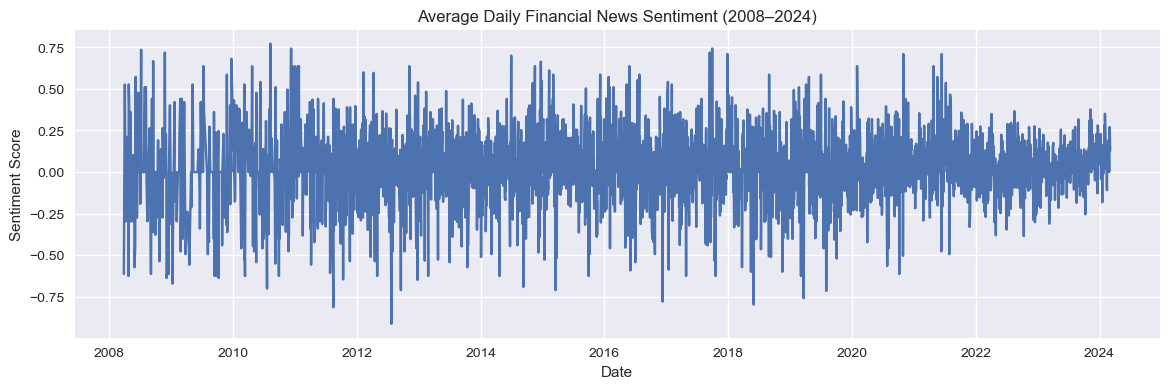

In [29]:
plt.figure(figsize=(14,4))
plt.plot(daily['Date'], daily['vader_score'])
plt.title("Average Daily Financial News Sentiment (2008–2024)")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.show()


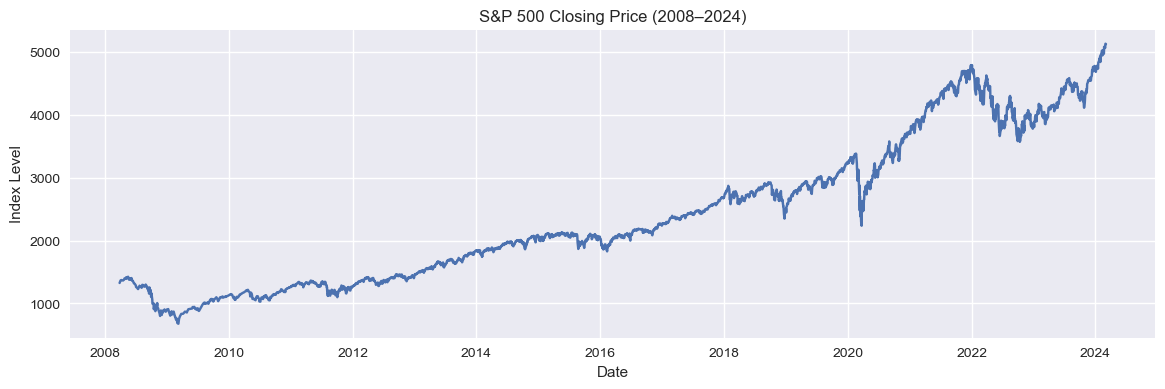

In [30]:
plt.figure(figsize=(14,4))
plt.plot(daily['Date'], daily['CP'])
plt.title("S&P 500 Closing Price (2008–2024)")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.show()


In [18]:
daily.head()
daily.to_csv("daily_sentiment.csv", index=False)